In [1]:
%matplotlib inline

In [2]:
import asapo_consumer
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tempfile
import cbf
import time
from IPython import display

broker, err = asapo_consumer.create_consumer("psana002:8400", "/tmp", "asapo_test2","","yzgAcLmijSLWIm8dBiGNCbc0i42u5HSm-zR6FRqo__Y=", 1000000)


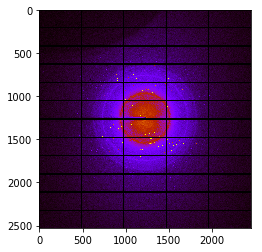

{'_id': 198, 'size': 6247362, 'name': 'data/file_lin/test_dir/sample_1_00001.cbf'}


In [9]:
last_id = 0
try:    
  while True:
    data, meta, err = broker.get_last(meta_only=False)
    id = meta['_id']
    if id == last_id:
        time.sleep(1)
        continue
    tmpfile = tempfile.NamedTemporaryFile()
    tmpfile.write(data)
    content = cbf.read(tmpfile.name)
    numpy_array_with_data = content.data
    header_metadata = content.metadata
    plt.imshow(numpy_array_with_data, cmap='gnuplot', vmax=500)
#    display.display(plt.gcf())
    display.clear_output(wait=True)
    plt.show()
    print (meta)      
    last_id = id
except KeyboardInterrupt:
    pass
    